In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score



##### Importing _" Breast-Cancer "_ dataset and splitting into train and test data

In [3]:
df = pd.read_csv("breast-cancer.csv")

In [4]:
cols = df.columns
cols

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
x = df.drop(columns=["id","diagnosis",cols[-1]], axis=0)
y_str = df["diagnosis"]

In [6]:
y_str.unique()

array(['M', 'B'], dtype=object)

In [7]:
x = np.array(x)

In [8]:
y = np.array([1 if y_str[i]=="M" else 0 for i in range(len(y_str))])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##### **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train,y_train)

c:\Users\Swarnarup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
lr_pred = lr_model.predict(x_test)

##### **Least Square Linear Classifier**

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train,y_train)

In [13]:
pred = linear_model.predict(x_test)
linear_pred = np.array([0 if i<0.5 else 1 for i in pred])

##### **Bayes Classifier**

In [14]:
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(x_train,y_train)

GaussianNB()

In [15]:
bayes_pred = bayes_model.predict(x_test)

##### **Support Vector Classifier**

In [16]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [17]:
svc_pred = svc_model.predict(x_test)

### Comparison

Accuracy score for  Logistic Regression  : 0.9707602339181286
Confusion mattrix : 
[[107   4]
 [  1  59]]


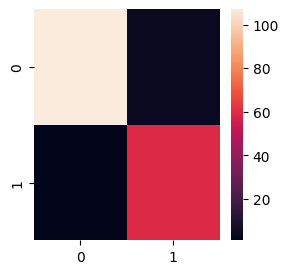

Accuracy score for  Least Square Linear Regression  : 0.9532163742690059
Confusion mattrix : 
[[106   6]
 [  2  57]]


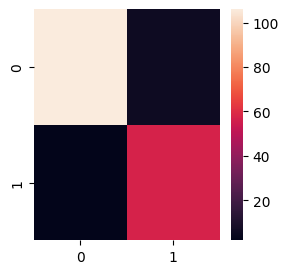

Accuracy score for  Bayes Classifier  : 0.9415204678362573
Confusion mattrix : 
[[104   6]
 [  4  57]]


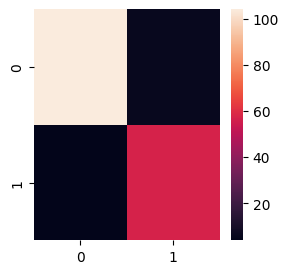

Accuracy score for  Support Vector classifier  : 0.935672514619883
Confusion mattrix : 
[[108  11]
 [  0  52]]


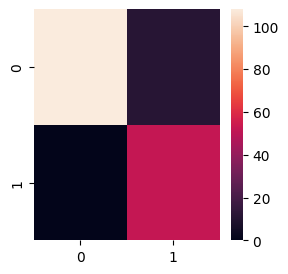

In [23]:
l = {"Logistic Regression":lr_pred, "Least Square Linear Regression":linear_pred, "Bayes Classifier": bayes_pred, "Support Vector classifier": svc_pred}
import seaborn as sns

for i in l:
    print("Accuracy score for ",i," : ",end="")
    print(accuracy_score(l[i], y_test))
    print("Confusion mattrix : ")
    print(confusion_matrix(l[i], y_test))
    
    plt.figure(figsize=(3,3))    
    sns.heatmap(confusion_matrix(l[i], y_test))
    plt.show()
